In [15]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Для датасета MNIST

In [78]:
augmentation = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomRotation(degrees=30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
])

In [79]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=augmentation)

In [80]:
mnist_original = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

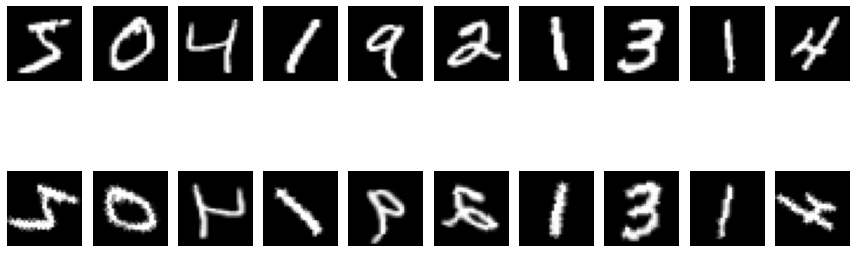

In [81]:
fig, ax = plt.subplots(2, 10, figsize=(12, 6))

for i in range(10):
    original_image, _ = mnist_original[i]
    ax[0, i].imshow(original_image.squeeze(), cmap='gray')
    ax[0, i].axis("off")

    augmented_image, _ = mnist_train[i]
    ax[1, i].imshow(augmented_image.permute(1, 2, 0).squeeze(), cmap='gray')
    ax[1, i].axis("off")

plt.tight_layout()
plt.show()

Для датасета EuroSAT

In [82]:
augmentation_pipeline = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(
        brightness=0.4, 
        contrast=0.4, 
        saturation=0.4, 
        hue=0.1
    ),
    transforms.RandomApply(
        [transforms.GaussianBlur(kernel_size=3)], 
        p=0.3
    ),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.2),
    transforms.ToTensor()
])

In [83]:
cifar10_train = datasets.EuroSAT(root='./data', download=True, transform=augmentation_pipeline)

In [84]:
cifar10_original = datasets.EuroSAT(root='./data', download=True, transform=transforms.ToTensor())

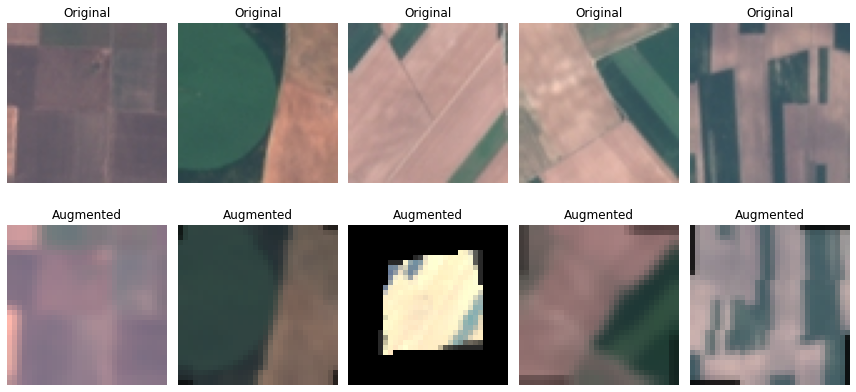

In [85]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

for i in range(5):
    original_image, _ = cifar10_original[i]
    ax[0, i].imshow(original_image.permute(1, 2, 0))
    ax[0, i].set_title("Original")
    ax[0, i].axis("off")

    augmented_image, _ = cifar10_train[i]
    ax[1, i].imshow(augmented_image.permute(1, 2, 0))
    ax[1, i].set_title("Augmented")
    ax[1, i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
В итоге мы видим что с помощью аугументаций мы можем расширить выборку научить модель на более сложных случаях